IMPORTACIONES

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

In [279]:
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data = pd.concat([train_data,test_data]).reset_index(inplace=False, drop = True)
total_data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82371,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
82372,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
82373,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
82374,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [233]:
total_data.shape

(82376, 21)

In [234]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [235]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [236]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [237]:
total_data.drop(['emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'], inplace=True, axis=1)

Analisis datos numéricos


In [238]:
num=["age","duration","campaign","pdays","previous"]#estos son todos los valores numericos
total_data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.0,32.0,38.0,47.0,98.0
duration,41176.0,258.315815,259.305321,0.0,102.0,180.0,319.0,4918.0
campaign,41176.0,2.567879,2.770318,1.0,1.0,2.0,3.0,56.0
pdays,41176.0,962.464810,186.937102,0.0,999.0,999.0,999.0,999.0
previous,41176.0,0.173013,0.494964,0.0,0.0,0.0,0.0,7.0


En pdays(dias que transcurrieron desde el ultimo contacto de campaña con el cliente) son la mayoria 999. Ahora procememos a analizar esta frecuencia:

In [239]:
total_data["pdays"].value_counts(ascending=False)

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

Con estos datos vamos a analizar la duracion de los contactos a los clientes:

In [240]:
total_data["duration_min"] = total_data["duration"]/60 #el valor nos lo da en segundos y lo pasamos a minutos
total_data.drop("duration", inplace=True, axis=1)#eliminamos la variable de los segundos
num[1]= "duration_min"



In [241]:
total_data["duration_min"].describe()

count    41176.000000
mean         4.305264
std          4.321755
min          0.000000
25%          1.700000
50%          3.000000
75%          5.316667
max         81.966667
Name: duration_min, dtype: float64

VARIABLES NO NUMERICAS

In [242]:
total_data.describe(include="O").T

,count,unique,top,freq
job,41176,12,admin.,10419
marital,41176,4,married,24921
education,41176,8,university.degree,12164
default,41176,3,no,32577
housing,41176,3,yes,21571
loan,41176,3,no,33938
contact,41176,2,cellular,26135
month,41176,10,may,13767
day_of_week,41176,5,thu,8618
poutcome,41176,3,nonexistent,35551


Missing data


In [243]:
nonum= ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]
for n in nonum:
    print(total_data[n].value_counts())
    print("\n")

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64


education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64


housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64


loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64


contact
cellular     26135
telephone    15041
Name: coun

Reemplazamos los valores inexistentes

In [244]:
total_data.replace(["unknown","nonexistent"], pd.NA, inplace=True)

In [245]:
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,duration_min
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,<NA>,no,4.350000
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,1,999,0,<NA>,no,2.483333
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,<NA>,no,3.766667
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,<NA>,no,2.516667
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,<NA>,no,5.116667


In [246]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41176 non-null  int64  
 1   job           40846 non-null  object 
 2   marital       41096 non-null  object 
 3   education     39446 non-null  object 
 4   default       32580 non-null  object 
 5   housing       40186 non-null  object 
 6   loan          40186 non-null  object 
 7   contact       41176 non-null  object 
 8   month         41176 non-null  object 
 9   day_of_week   41176 non-null  object 
 10  campaign      41176 non-null  int64  
 11  pdays         41176 non-null  int64  
 12  previous      41176 non-null  int64  
 13  poutcome      5625 non-null   object 
 14  y             41176 non-null  object 
 15  duration_min  41176 non-null  float64
dtypes: float64(1), int64(4), object(11)
memory usage: 5.0+ MB


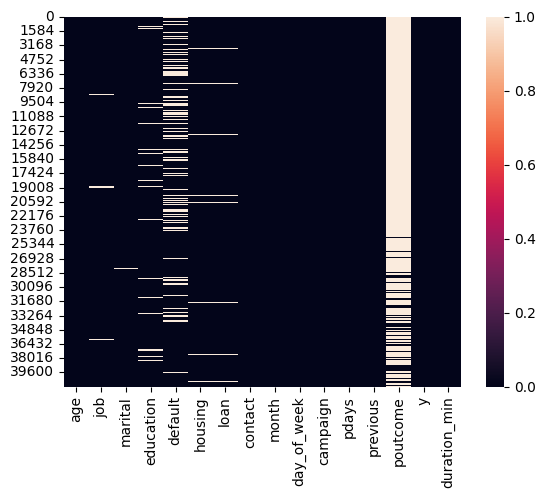

In [247]:
sns.heatmap(total_data.isna())
plt.show()

In [248]:
print(total_data.isna().sum().sort_values(ascending=False))

poutcome        35551
default          8596
education        1730
housing           990
loan              990
job               330
marital            80
age                 0
contact             0
month               0
day_of_week         0
campaign            0
pdays               0
previous            0
y                   0
duration_min        0
dtype: int64


In [249]:
total_data["poutcome"].fillna("nonexistent", inplace = True)
pd.crosstab(total_data["poutcome"], total_data["y"])

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32411,3140
success,479,894


ANALISIS UNIVARIADO

In [250]:
num

['age', 'duration_min', 'campaign', 'pdays', 'previous']

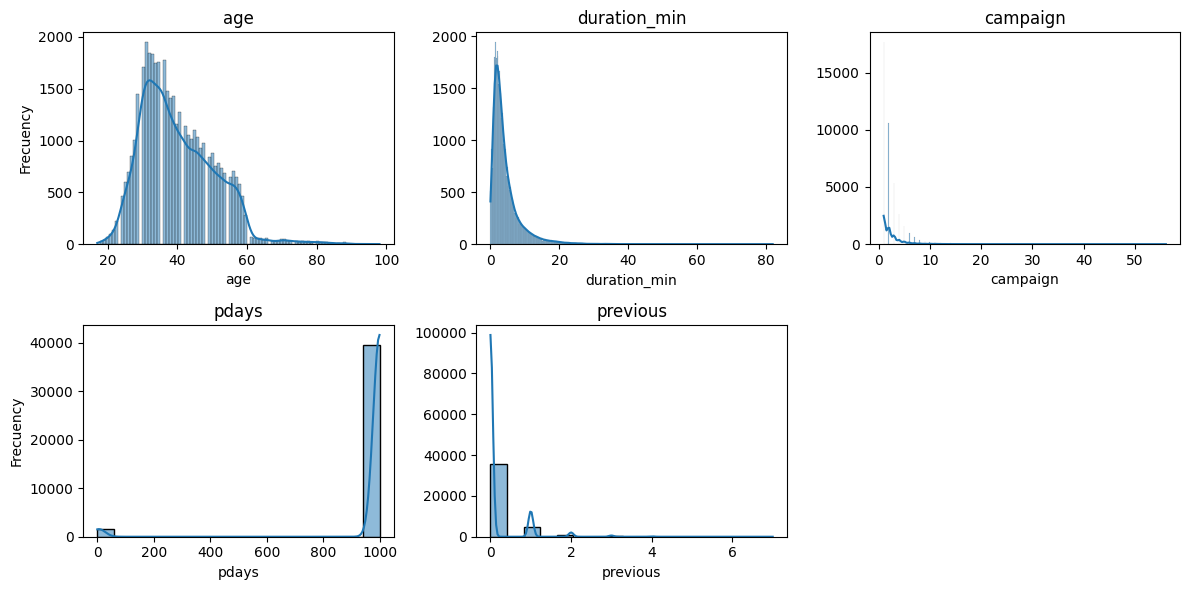

In [251]:
cols=3
rows=((len(num) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 3))

for col, ax in zip(num, axis.flatten()):
  sns.histplot(total_data[col], kde=True, ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')

axis[0,0].set_ylabel('Frecuency')
axis[1,0].set_ylabel('Frecuency')


for i in range(len(num), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

Segun estos datos, podemos obtener estos datos:

    - La mayoria de los clientes de la base de datos del banco estan entro los 20 y 40 años.
    - La mayoria de las llamadas duran menos de 20 minutos.
    - La variable entre campaña y transcurrido tienen valores muy dispares, lo que dificulta su interpretacion.
    - La mayor parte de los clientes, su ultima campaña fue superior a 3 años.
    - Y la gran mayoria de los clientes de esta campaña fueron contactados  menos de dos veces en la campaña anterior.

Datos Categóricos -  Bartplots

In [252]:
nonum

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

/tmp/ipykernel_630/3380314376.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_630/3380314376.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
/tmp/ipykernel_630/3380314376.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1,3].set_xticklabels(axis[1,3].get_xticklabels(), rotation=90)


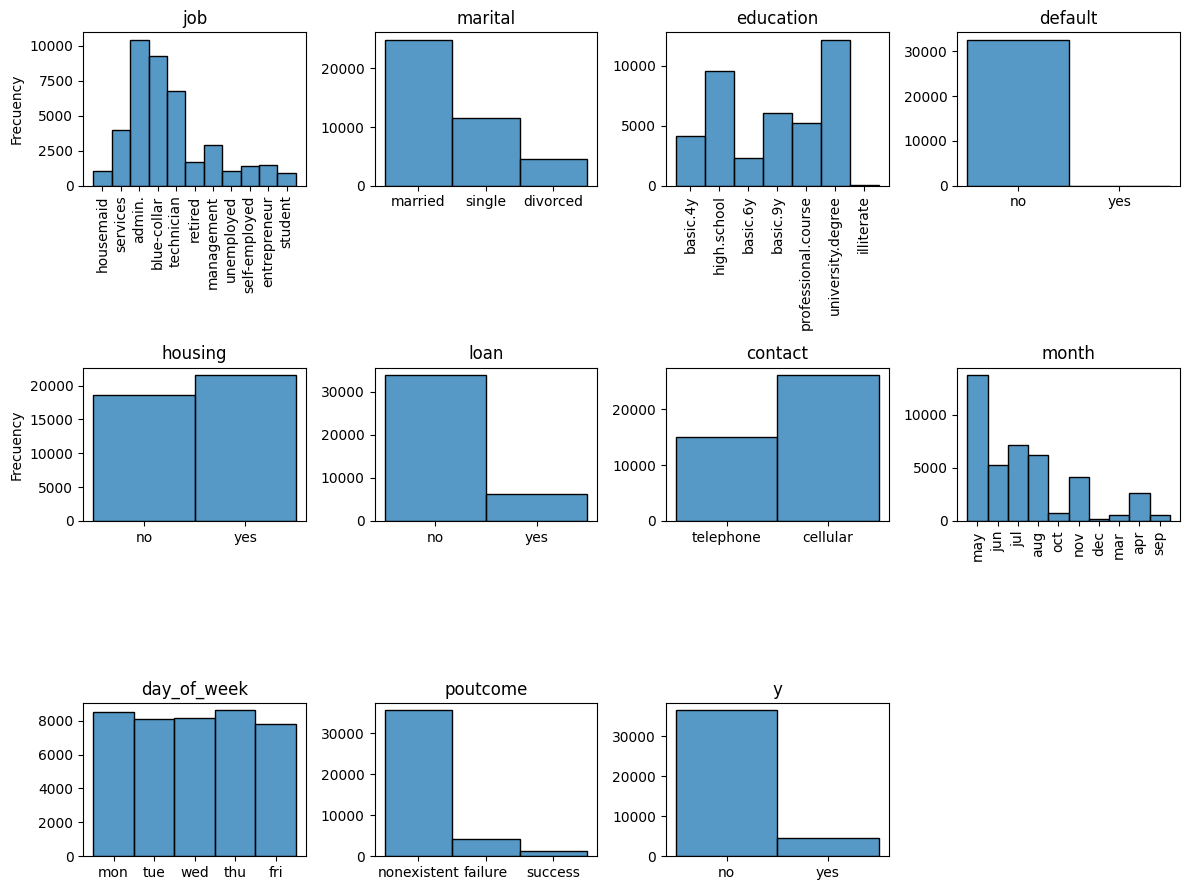

In [253]:
cols=4
rows=((len(nonum) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 3))

for col, ax in zip(nonum, axis.flatten()):
  sns.histplot(total_data[col], kde=False, ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')
  ax.set_xlabel('')

axis[0,0].set_ylabel('Frecuency')
axis[1,0].set_ylabel('Frecuency')
axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
axis[1,3].set_xticklabels(axis[1,3].get_xticklabels(), rotation=90)

#eliminamos datos vacios
for i in range(len(nonum), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

Analizando estos gráficos podemos observar que:
- La mayoria de los clientes de la base de datos del banco , su perfil laboral es adminsitrativo.
- La mayoria de los clientes se encuentra casado.
- La mayoria de los clientes tienen estudios secundarios o universitarios.
- En la mayoria de los casos no se encuentra mora crediticia.
- La mayor parte de los clientes fueron contactados a traves del teléfono movil
    

ANALISIS MULTIVARIADO

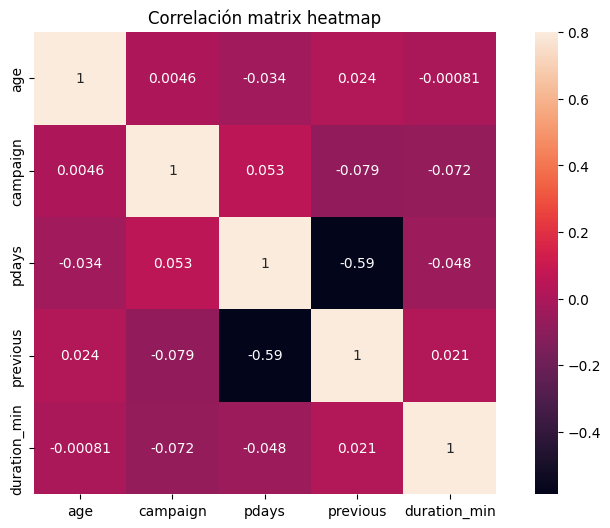

In [254]:
corr = total_data.select_dtypes(include=['number']).corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, vmax=.8, square=True, annot=True)
plt.title('Correlación matrix heatmap')
plt.show()

Como podemos comprobar en dicho mapa, no observamos gran coorrelacion entre las variables, la mayor correlacion que observamos es entre la ultima campaña de contacto y el numero de contactos realizados en la campaña anterior, pero es una correlacion negativa.

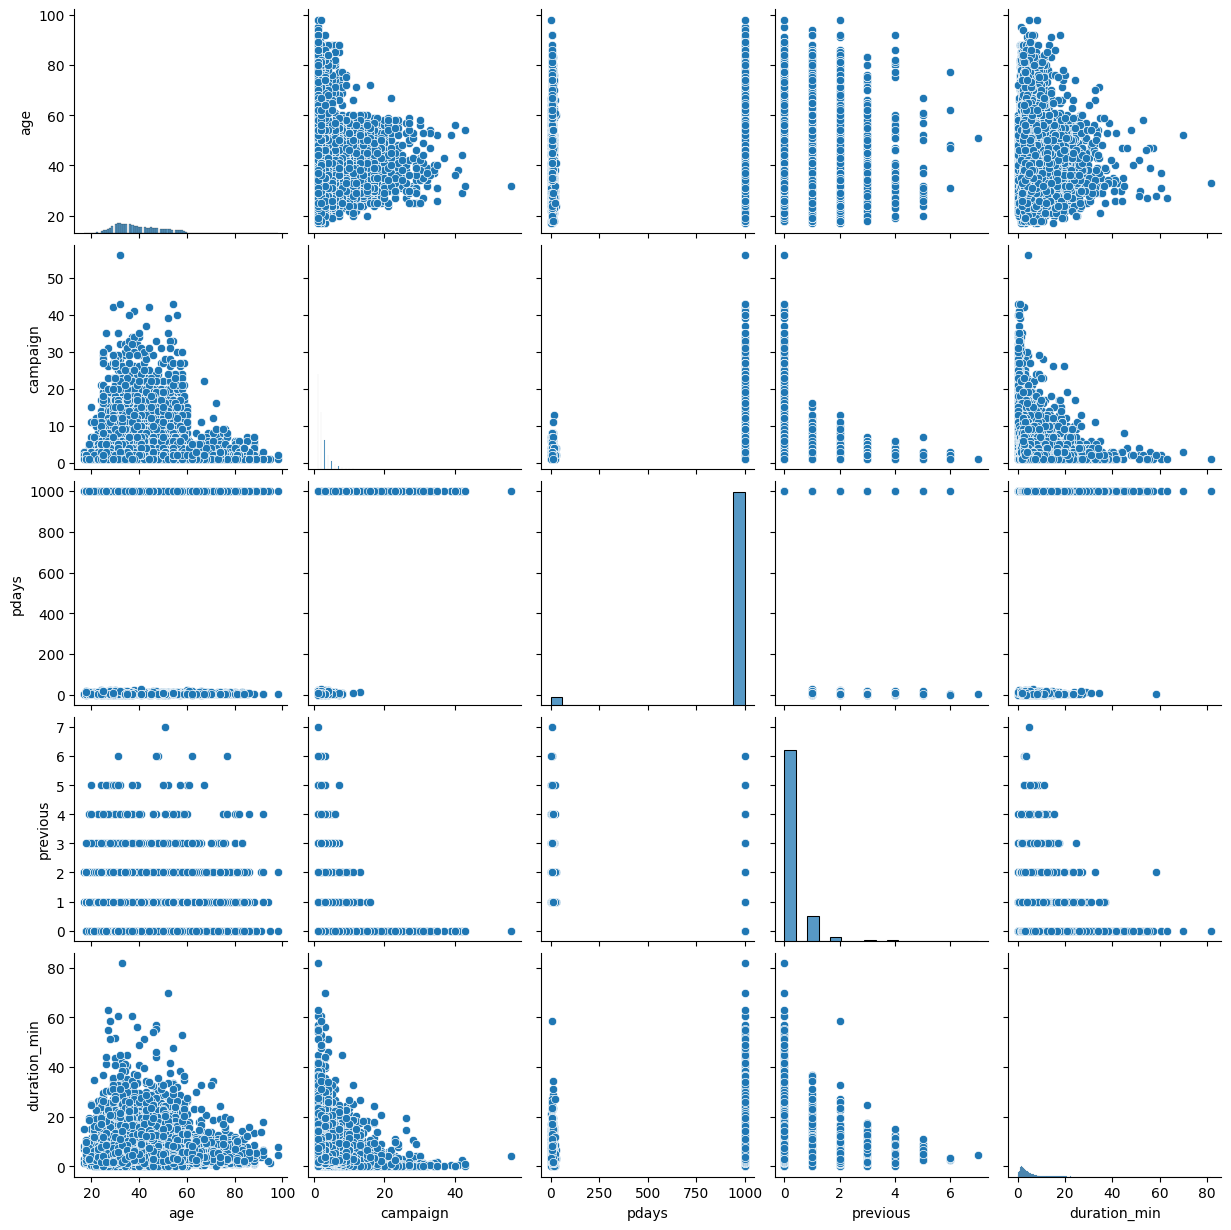

In [255]:
sns.pairplot(total_data, corner=False)
plt.show()

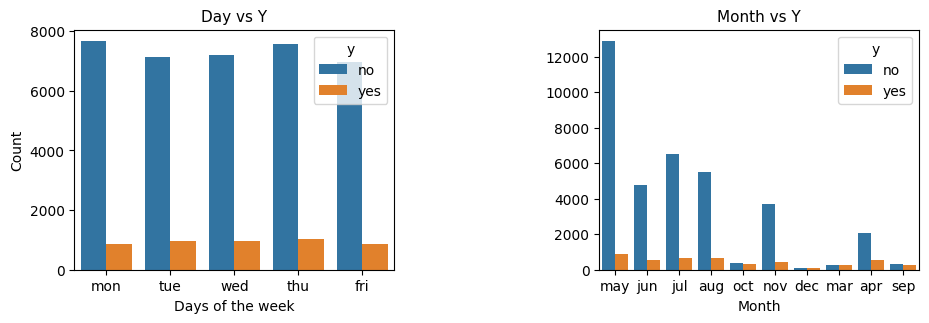

In [256]:
fig=plt.figure()
fig1=fig.add_axes([0.1,0.1,0.5,0.5])
fig2=fig.add_axes([0.92,0.1,0.5,0.5]) #coodinates: [x, y,] size[width, height]
sns.countplot(data=total_data, x='day_of_week', hue='y' ,ax=fig1)
fig1.set_ylabel('Count')
fig1.set_xlabel('Days of the week')
fig1.set_title('Day vs Y').set_fontsize(11)
sns.countplot(data=total_data, x='month', hue='y', ax=fig2)
fig2.set_ylabel('')
fig2.set_xlabel('Month')
fig2.set_title('Month vs Y').set_fontsize(11)
plt.show()

Los meses de mayor actividad fueron mayo, julio, agosto y junio.
Con respecto a los dias de la semana la actividad fue bastante parecida todos los dias.

DATA CLEANING- FEATURE ENGINEERING


Tras analizar los datos, procedemos a:
- Eliminaremos la variable pdays debido a que la mayoria de los valores tienen un valor de 999,
- eliminaremos los outputs en llamadas de mas de 60 minutos y campañas con valores superiores a 50.

In [257]:
total_data.drop('pdays', axis=1, inplace=True)
conditions=(total_data['duration_min']>60)|(total_data['campaign']>50)
print('El número de observaciones que han sido eliminadas por outputs:', len(total_data[conditions]))
total_data.drop(total_data[conditions].index, inplace=True)

El número de observaciones que han sido eliminadas por outputs: 6


In [258]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41170 entries, 0 to 41175
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41170 non-null  int64  
 1   job           40840 non-null  object 
 2   marital       41090 non-null  object 
 3   education     39440 non-null  object 
 4   default       32575 non-null  object 
 5   housing       40181 non-null  object 
 6   loan          40181 non-null  object 
 7   contact       41170 non-null  object 
 8   month         41170 non-null  object 
 9   day_of_week   41170 non-null  object 
 10  campaign      41170 non-null  int64  
 11  previous      41170 non-null  int64  
 12  poutcome      41170 non-null  object 
 13  y             41170 non-null  object 
 14  duration_min  41170 non-null  float64
dtypes: float64(1), int64(3), object(11)
memory usage: 5.0+ MB


Modificamos la variable edad para dirigirla a grupos de edad específicos:

In [259]:
#Creating age generational groups as dummy/binary variables:
total_data['gen_z']=total_data['age'].apply(lambda x: 1 if x<=28 else 0)

total_data['millenial']=total_data['age'].apply(lambda x: 1 if x>28 and x<=43 else 0)

total_data['gen_x']=total_data['age'].apply(lambda x: 1 if x>43 and x<=58 else 0)

total_data['boomer']=total_data['age'].apply(lambda x: 1 if x>58 and x<=77 else 0)

total_data['silent']=total_data['age'].apply(lambda x: 1 if x>=78 else 0)

#y ahora con estos nuevas datos eliminamos la variable edad 
total_data.drop('age', axis=1, inplace=True)

Convertimos las variables categoricas en ficticias/binarios o numericas 

In [260]:
#Mes
total_data['month'] = pd.to_datetime(total_data['month'], format='%b', errors='coerce')
total_data['month'] = total_data['month'].dt.month

#dia de la semana
day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
    }
total_data['day_of_week'] = total_data['day_of_week'].map(day_mapping)

La variable educacion y trabajo ,unificamos categorias similares:


In [261]:
print(total_data['job'].value_counts())

job
admin.           10417
blue-collar       9252
technician        6737
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1013
student            875
Name: count, dtype: int64


Unificamos y agrupamos los jubilados, amas de casa y estudiantes.

In [262]:
job_dic={
    'student': 'e.inactive',
    'housemaid': 'e.inactive',
    'retired': 'e.inactive',
    'admin.':'admin'
}

total_data['job']=total_data['job'].replace(job_dic)

print(total_data['job'].value_counts())

job
admin            10417
blue-collar       9252
technician        6737
services          3967
e.inactive        3653
management        2924
entrepreneur      1456
self-employed     1421
unemployed        1013
Name: count, dtype: int64


La variable educacion la dividiremos entre menor a instituto(high.school)

In [263]:
print(total_data["education"].value_counts())

education
university.degree      12163
high.school             9511
basic.9y                6045
professional.course     5237
basic.4y                4175
basic.6y                2291
illiterate                18
Name: count, dtype: int64


In [264]:
#recoding variable education
educ_dic={
    'basic.9y': 'high.school.less',
    'basic.4y': 'high.school.less',
    'basic.6y': 'high.school.less',
    'illiterate':'high.school.less'
}

total_data['education']=total_data['education'].replace(educ_dic)

print(total_data['education'].value_counts())

education
high.school.less       12529
university.degree      12163
high.school             9511
professional.course     5237
Name: count, dtype: int64


Conversion de variables categóricas en variables  binarias/ficticias

In [265]:
total_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'previous', 'poutcome', 'y',
       'duration_min', 'gen_z', 'millenial', 'gen_x', 'boomer', 'silent'],
      dtype='object')

In [266]:
to_num=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'poutcome', 'y', 'month', 'day_of_week']

for var in to_num:
   total_data=pd.get_dummies(total_data, columns=[var], drop_first=True,prefix=var)#al aplicar la funcino get_dummies los datos desconocidos se incluye el valor 0.

In [267]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41170 entries, 0 to 41175
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   campaign                       41170 non-null  int64  
 1   previous                       41170 non-null  int64  
 2   duration_min                   41170 non-null  float64
 3   gen_z                          41170 non-null  int64  
 4   millenial                      41170 non-null  int64  
 5   gen_x                          41170 non-null  int64  
 6   boomer                         41170 non-null  int64  
 7   silent                         41170 non-null  int64  
 8   job_blue-collar                41170 non-null  bool   
 9   job_e.inactive                 41170 non-null  bool   
 10  job_entrepreneur               41170 non-null  bool   
 11  job_management                 41170 non-null  bool   
 12  job_self-employed              41170 non-null  bool

In [268]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign,41170.0,2.566699,2.757941,1.0,1.0,2.0,3.000000,43.000000
previous,41170.0,0.173039,0.494996,0.0,0.0,0.0,0.000000,7.000000
duration_min,41170.0,4.297618,4.265089,0.0,1.7,3.0,5.316667,58.483333
gen_z,41170.0,0.102332,0.303088,0.0,0.0,0.0,0.000000,1.000000
millenial,41170.0,0.559072,0.496504,0.0,0.0,1.0,1.000000,1.000000
gen_x,41170.0,0.298397,0.457560,0.0,0.0,0.0,1.000000,1.000000
boomer,41170.0,0.035560,0.185192,0.0,0.0,0.0,0.000000,1.000000
silent,41170.0,0.004639,0.067955,0.0,0.0,0.0,0.000000,1.000000


In [269]:
total_data.columns

Index(['campaign', 'previous', 'duration_min', 'gen_z', 'millenial', 'gen_x',
       'boomer', 'silent', 'job_blue-collar', 'job_e.inactive',
       'job_entrepreneur', 'job_management', 'job_self-employed',
       'job_services', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_high.school.less',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5'],
      dtype='object')

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

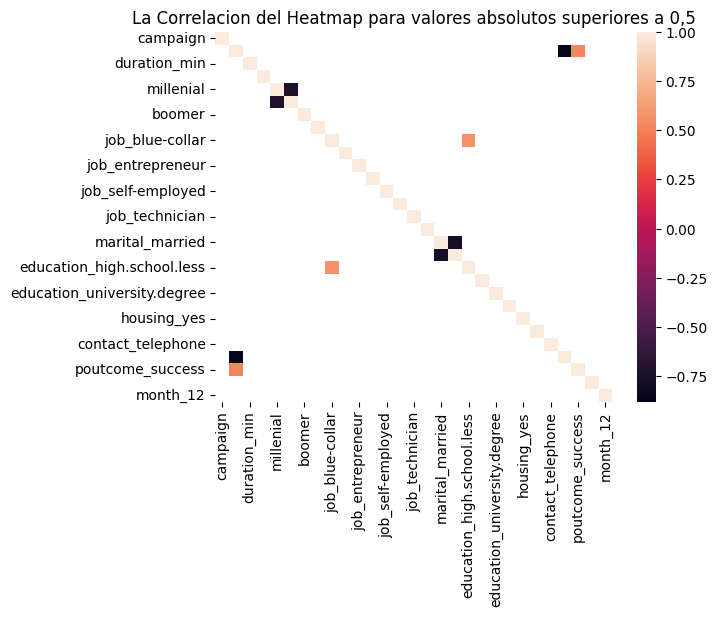

In [270]:
to_drop=['month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
        'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5']

corr_matrix=total_data.drop(to_drop, axis=1).corr()

sns.heatmap(corr_matrix[corr_matrix.abs()>=0.5])
plt.title('La Correlacion del Heatmap para valores absolutos superiores a 0,5')
plt.plot

In [275]:
data_clean=total_data.copy()
data_clean.to_csv('/workspaces/proyetmlalgorithm/data/raw/data_clean.csv', index=False)

TRAIN Y DATA TEST

In [276]:
data_clean.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   campaign      8 non-null      float64
 1   previous      8 non-null      float64
 2   duration_min  8 non-null      float64
 3   gen_z         8 non-null      float64
 4   millenial     8 non-null      float64
 5   gen_x         8 non-null      float64
 6   boomer        8 non-null      float64
 7   silent        8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [282]:
# Separamos los datos en Train y Test

X = data_clean.drop(['y_yes'], axis = 1) #y_yes is the dependent variable, y_no is the inverse
y = data_clean["y_yes"] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Escalamos las variables continuas
to_scale=['campaign', 'previous', 'duration_min']
scaler=MinMaxScaler()
scaler.fit(X_train[to_scale])

train_scl=pd.DataFrame(scaler.transform(X_train[to_scale]), index=X_train.index, columns=to_scale)#almacenamos las variables escaladas en dataframe
test_scl=pd.DataFrame(scaler.transform(X_test[to_scale]), index=X_test.index, columns=to_scale)#almacenamos las variables escaladas en dataframee

X_train_sc=X_train.copy()
X_train_sc[to_scale]=train_scl[to_scale] #reemplazamos las variables escaladas en train dataset

X_test_sc=X_test.copy()
X_test_sc[to_scale]=test_scl[to_scale] #reemplazamos las variables escaladas en test dataset

#almacenamos los datos escalados y sin escalar

X_train.to_csv('/workspaces/proyetmlalgorithm/data/interim/X_train_sc.csv', index=False) #UNscaled
X_train_sc.to_csv('/workspaces/proyetmlalgorithm/data/interim/X_train_sc.csv', index=False) #Scaled
open("/workspaces/proyetmlalgorithm/data/interim/y_train.txt", "w").write(y_train.to_string(index=False))

X_test.to_csv('/workspaces/proyetmlalgorithm/data/interim/X_test_sc.csv', index=False) #UNscaled
X_test_sc.to_csv('/workspaces/proyetmlalgorithm/data/interim/X_test_sc.csv', index=False) #Scaled
open("/workspaces/proyetmlalgorithm/data/interim/y_test.txt", "w").write(y_test.to_string(index=False))

dump(scaler, open('/workspaces/proyetmlalgorithm/data/interim/mm_scaler.pk','wb'))

SELECCIÓN DE CARACTERISTICAS

In [286]:
# Seleccion del 50% de variables más relevantes

selection_model = SelectKBest(f_classif, k = int(len(X_train_sc.columns)*0.5)) 
selection_model.fit(X_train_sc, y_train)

mask = selection_model.get_support()
X_train_sc_sel = pd.DataFrame(selection_model.transform(X_train_sc), columns = X_train_sc.columns.values[mask])
X_train_sc_sel.to_csv('/workspaces/proyetmlalgorithm/data/interim/X_train_sc_sel.csv', index=False)

X_test_sc_sel = pd.DataFrame(selection_model.transform(X_test_sc), columns = X_test_sc.columns.values[mask])
X_test_sc_sel.to_csv('/workspaces/proyetmlalgorithm/data/interim/X_test_sc_sel.csv', index=False)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


MACHINE LEARNING